# Bachelor Thesis
## MNIST classification using persistent homology

### Installs/Imports

In [2]:
#!pip install giotto-tda
#!pip install catboost
#!pip install lightgbm
#!pip install xgboost

distutils: /home/snopoff/miniconda3/envs/topology/include/python3.9/UNKNOWN
sysconfig: /home/snopoff/miniconda3/envs/topology/include/python3.9
user = False
home = None
root = None
prefix = None
     |████▏                           | 9.0 MB 5.3 MB/s eta 0:00:12^C             | 1.9 MB 1.6 MB/s eta 0:00:42

ERROR: Operation cancelled by user
distutils: /home/snopoff/miniconda3/envs/topology/include/python3.9/UNKNOWN
sysconfig: /home/snopoff/miniconda3/envs/topology/include/python3.9
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 2.0 MB 1.5 MB/s eta 0:00:01
^C
ERROR: Operation cancelled by user
distutils: /home/snopoff/miniconda3/envs/topology/include/python3.9/UNKNOWN
sysconfig: /home/snopoff/miniconda3/envs/topology/include/python3.9
user = False
home = None
root = None
prefix = None
     |▍                               | 2.1 MB 1.5 MB/s eta 0:01:52^C

ERROR: Operation cancelled by user


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
from plotly.subplots import make_subplots
from sklearn import datasets
from IPython.display import HTML

from sklearn.model_selection import train_test_split

from gtda.homology import CubicalPersistence
from gtda.images import Binarizer, RadialFiltration, DensityFiltration
from gtda.diagrams import Scaler

from gtda.diagrams import HeatKernel

from sklearn.pipeline import make_pipeline, make_union, Pipeline
from gtda.diagrams import PersistenceEntropy, Amplitude
from gtda.images import HeightFiltration
from sklearn import set_config

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from scipy.stats import pearsonr

### 1. Load MNIST Data and create train/test datasets

Let's load MNIST data

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

In [3]:
y = y.to_numpy()
X = X.to_numpy().reshape((-1, 28, 28))

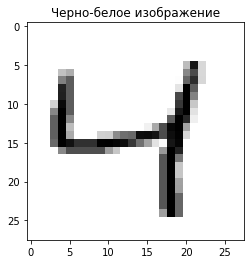

In [4]:
plt.imshow(X[2], cmap='gray_r')
plt.title("Черно-белое изображение")
plt.show()

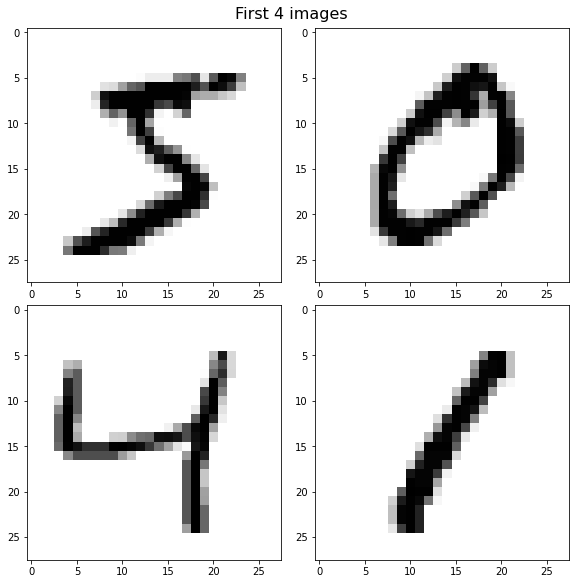

In [5]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8), constrained_layout=True)
for i in range(4):
    ax = axes.flat[i]
    ax.imshow(X[i], cmap='gray_r')
fig.suptitle("First 4 images", fontsize = 16)
plt.show()

In [4]:
 train_size, test_size = 700, 300


X_train, X_test, y_train, y_test = train_test_split(
     X, y, train_size=train_size, test_size=test_size, random_state = 21, shuffle = True)

In [5]:
y_train.shape

(700,)

### 2. Create cubical complexes from data and extract topological features

#### 2.1 Binarization

In [ ]:
binarizer = Binarizer(threshold=0.4)

In [ ]:
X_bin = binarizer.fit_transform(X).reshape((-1, 28, 28))

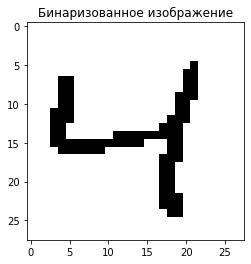

In [ ]:
plt.imshow(X_bin[2], cmap='gray_r')
plt.title("Бинаризованное изображение")
plt.show()

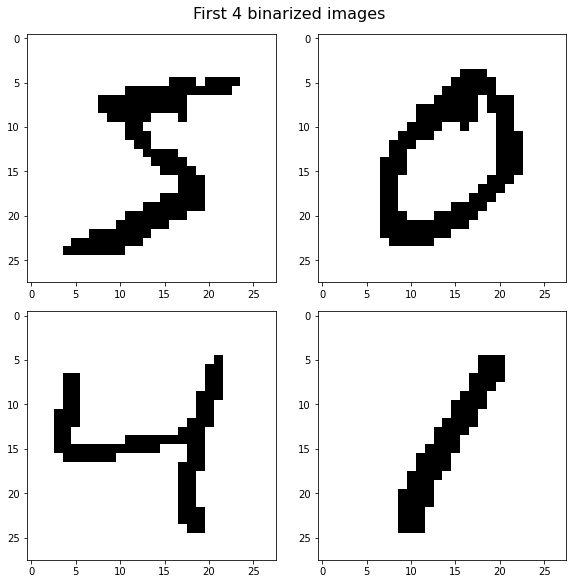

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8), constrained_layout=True)
for i in range(4):
    ax = axes.flat[i]
    ax.imshow(X_bin[i], cmap = 'gray_r')
fig.suptitle("First 4 binarized images", fontsize = 16)
plt.show()

#### 2.2 Filtration

In [ ]:
radial_filtration = RadialFiltration(center=np.array([20, 6]))
height_filtration = HeightFiltration(direction=np.array([1,0]))
density_filtration = DensityFiltration(radius=5)

rad = radial_filtration.fit_transform(X_bin).reshape((-1, 28, 28))
height = height_filtration.fit_transform(X_bin).reshape((-1, 28, 28))
dens = density_filtration.fit_transform(X_bin).reshape((-1, 28, 28))
img = X[2]

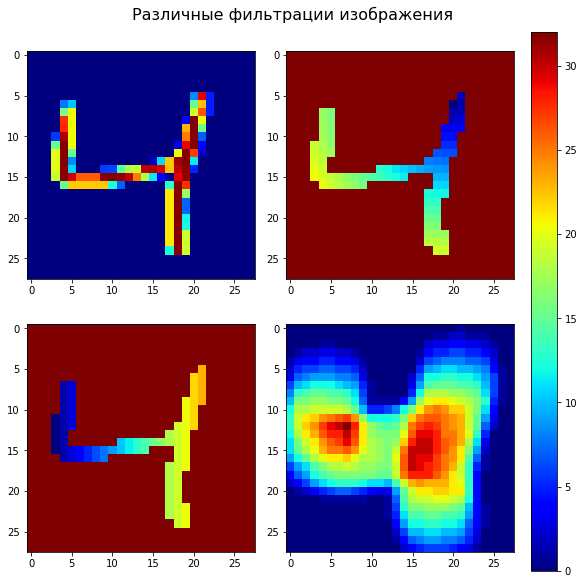

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8), constrained_layout=True)
axes[0][0].imshow(img, cmap='jet')
axes[0][1].imshow(rad[2], cmap='jet')
axes[1][0].imshow(height[2], cmap='jet')
im = axes[1][1].imshow(dens[2], cmap='jet')

fig.suptitle("Различные фильтрации изображения", fontsize = 16)
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

In [ ]:
X_filt = radial_filtration.fit_transform(X_bin).reshape((-1, 28, 28))

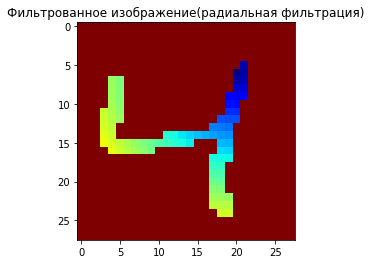

In [ ]:
plt.imshow(X_filt[2], cmap='jet')
plt.title("Фильтрованное изображение(радиальная фильтрация)")
plt.show()

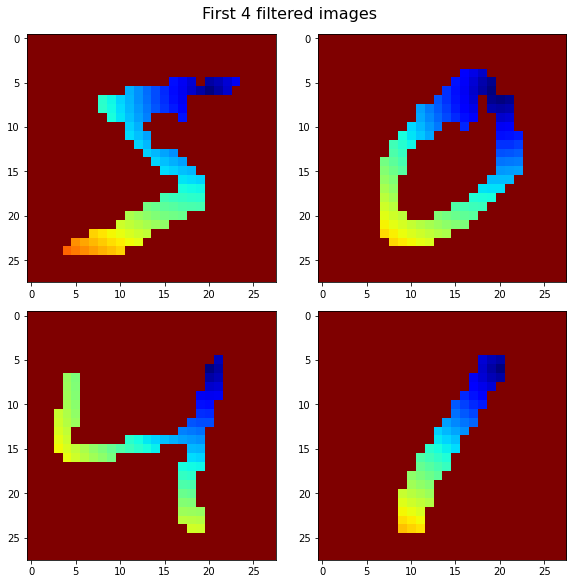

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8), constrained_layout=True)
for i in range(4):
    ax = axes.flat[i]
    ax.imshow(X_filt[i], cmap = "jet")
fig.suptitle("First 4 filtered images", fontsize = 16)
plt.show()

#### 2.3 Persistence

In [ ]:
cubical_persistence = CubicalPersistence(n_jobs=-1)

In [ ]:
X_rad = cubical_persistence.fit_transform(rad)
X_height = cubical_persistence.fit_transform(height)
X_dens = cubical_persistence.fit_transform(dens)

In [ ]:
cubical_persistence.plot(X_rad)

In [ ]:
cubical_persistence.plot(X_height)

In [ ]:
cubical_persistence.plot(X_dens)

In [ ]:
X_pers = cubical_persistence.fit_transform(X_filt)

In [ ]:
cubical_persistence.plot(X_pers[2][None, :, :])

#### 2.4 Scaling

In [ ]:
scaler = Scaler()

In [ ]:
X_rad_scale = scaler.fit_transform(X_rad)
X_height_scale = scaler.fit_transform(X_height)
X_dens_scale = scaler.fit_transform(X_dens)

In [ ]:
scaler.plot(X_height_scale)

In [ ]:
scaler.plot(X_rad_scale)

In [ ]:
scaler.plot(X_dens_scale)

In [ ]:
X_scale = scaler.fit_transform(X_pers)

In [ ]:
scaler.plot(X_scale[0][None, :, :])

### 3. Vector representation

In [ ]:
heat = HeatKernel(sigma=.15, n_bins=60, n_jobs=-1)

In [ ]:
X_heat = heat.fit_transform(X_scale)

In [ ]:
heat.fit_transform_plot(X_rad_scale,colorscale='jet')

array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 7.34794600e-05,  7.73586555e-05,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 1.83242486e-05,  0.00000000e+00, -7.73586555e-05, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00, -1.83242486e-05, -7.34794600e-05, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e

In [ ]:
heat.fit_transform_plot(X_dens_scale,colorscale='jet')

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.97530156,  0.48757006,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.50564106,  0.        , -0.48757006, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        , -0.50564106, -0.97530156, ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [ ]:
heat.fit_transform_plot(X_height_scale, colorscale='jet')

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]])

In [ ]:
heat.plot(X_heat[2][None, :, :], homology_dimension_idx=0, colorscale='jet')

### 4. Creating pipeline

In [6]:
direction_list = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

radius_list = [2, 4, 6]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
    + [DensityFiltration(radius=r) for r in radius_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Listing all metrics we want to use to extract diagram amplitudes
metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]


feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)] #add features
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)

set_config(display='diagram')

tda_union

FeatureUnion(n_jobs=-1,
             transformer_list=[('pipeline-1',
                                Pipeline(steps=[('binarizer',
                                                 Binarizer(n_jobs=-1,
                                                           threshold=0.4)),
                                                ('heightfiltration',
                                                 HeightFiltration(direction=array([1, 0]),
                                                                  n_jobs=-1)),
                                                ('cubicalpersistence',
                                                 CubicalPersistence(n_jobs=-1)),
                                                ('scaler', Scaler(n_jobs=-1)),
                                                ('featureunion',
                                                 FeatureUnion(transformer_list=[('persistenceentropy',
                                                                                 Persist...
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-11',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-12',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-13',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1))]))]))])

In [7]:
X_train_tda = tda_union.fit_transform(X_train)
X_test_tda = tda_union.transform(X_test)
X_train_tda.shape

(700, 560)

### 5. Classification

Random Forest Classifier:

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train)

acc_rf = rf.score(X_train_tda, y_train)
score_rf = rf.score(X_test_tda, y_test)

Logistic Regression:

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_tda, y_train)

acc_lr = lr.score(X_train_tda, y_train)
score_lr = lr.score(X_test_tda, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Support Vector Machine Classifier:

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train_tda, y_train)

acc_svc = svc.score(X_train_tda, y_train)
score_svc = svc.score(X_test_tda, y_test)

In [ ]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

LightGBM

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_tda, y_train)

acc_lgbm = lgbm.score(X_train_tda, y_train)
score_lgbm = lgbm.score(X_test_tda, y_test)

CatBoost

In [ ]:
cat = CatBoostClassifier()#task_type="GPU", devices='0:1')
cat.fit(X_train_tda, y_train, verbose=False)

acc_cat = cat.score(X_train_tda, y_train)
score_cat = cat.score(X_test_tda, y_test)

XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_tda, y_train)

acc_xgb = xgb.score(X_train_tda, y_train)
score_xgb = xgb.score(X_test_tda, y_test)

In [ ]:
print("RF:\t", acc_rf, "\t", score_rf)
print("LR:\t", acc_lr, "\t", score_lr)
print("SVC:\t", acc_svc, "\t", score_svc)
print("LGBM:\t", acc_lgbm, "\t", score_lgbm)
print("CatBoost:", acc_cat, "\t", score_cat)
print("xgb:\t", acc_xgb, "\t", score_xgb)

RF:	 1.0 	 0.89
LR:	 0.9885714285714285 	 0.9033333333333333
SVC:	 1.0 	 0.8933333333333333
LGBM:	 1.0 	 0.9
CatBoost: 1.0 	 0.8933333333333333
xgb:	 1.0 	 0.8833333333333333


### 6. Tuning

#### 6.1 Feature Selection

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train)

print(rf.score(X_test_tda, y_test))

len(rf.feature_importances_)
#bestFeatures = rf.feature_importances_.argsort()[-250:][::-1]
#X_train_best = X_train_tda[:, bestFeatures]

0.89


644

In [ ]:
bestFeatures = rf.feature_importances_.argsort()[-200:][::-1]
X_train_best = X_train_tda[:, bestFeatures]
X_test_best = X_test_tda[:, bestFeatures]

#### 6.2 Tuning models

##### 6.2.1 Random Forest __(0.8842913563943607 for 200 features & 0.8742831639827348 for 250)__

In [53]:
# rf_params = {
#     "n_estimators": [500, 1000, 2000],
#     'max_depth': [80, 90, 100],
#     'max_features': [2, 3, 4],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# rf = RandomForestClassifier(random_state=42)

# rf_grid = GridSearchCV(
#     estimator=rf, param_grid=rf_params, cv=3, n_jobs=-1, verbose=4
# )

# rf_grid.fit(X_train_tda, y_train)
rf_best = {'max_depth': 80,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200};

rf = RandomForestClassifier(random_state=42, **rf_best)
rf.fit(X_train_tda, y_train)
rf_bestacc = rf.score(X_train_tda, y_train)
rf_bestscore = rf.score(X_test_tda, y_test)

##### 6.2.2 Support Vector Machine __(0.901409828448455 for 200 features & 0.9113996796400231 for 250)__

In [56]:
# svm_params = {
#     'kernel' : ('linear', 'sigmoid', 'rbf', 'poly'),
#     'C' : [10, 100],#[10 ** i for i in range(-2, 3)],
#     'degree' : [3, 5, 7],
#     'coef0' : [1.]#[j**i for i in np.arange(-4,1,1) for j in np.arange(1.,4.,1.)],
#     'gamma' : ('scale', 'auto'),
#     'decision_function_shape': ('ovr', 'ovo')
# }

# svm = SVC(random_state=42)

# svm_grid = GridSearchCV(
#     estimator=svm, param_grid=svm_params, cv=3, n_jobs=-1, verbose=4
# )

# svm_grid.fit(X_train_tda, y_train)
svm_best = {'C': 10,
 'coef0': 1.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear'}

svm = SVC(random_state=42, **svm_best)
svm.fit(X_train_tda, y_train)

svm_bestacc = svm.score(X_train_tda, y_train)
svm_bestscore = svm.score(X_test_tda, y_test)

##### 6.2.3 Logistic Regression __(0.9028526710930146 for 200 features & 0.9099874056955602 for 250)__

In [57]:
# log_params = {
#     "C" : np.logspace(-3,3,7), 
#     "penalty" : ["l1","l2", "lasso"],
#     "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
# }

# log = LogisticRegression()

# log_grid = GridSearchCV(
#     estimator=log, param_grid=log_params, cv=3, n_jobs=-1, verbose=4
# )

# log_grid.fit(X_train_tda, y_train)

log_best = {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}

log = LogisticRegression(random_state=42, **log_best)

log.fit(X_train_tda, y_train)
log_bestacc = log.score(X_train_tda, y_train)
log_bestscore = log.score(X_test_tda, y_test)

##### 6.2.4 CatBoost __(0.89 for both)__

In [58]:
# cat = CatBoostClassifier(iterations=250);

# grid = {'learning_rate': [0.003, 0.03],
#         'depth': [4, 6, 8],
#         'l2_leaf_reg': [0.03, 0.1, 1]}

# grid_search_result = cat.grid_search(grid, 
#                                        X=X_train_tda, 
#                                        y=y_train, 
#                                        plot=True)

cat_best = {'depth': 8, 'learning_rate': 0.03, 'l2_leaf_reg': 0.03, 'iterations' : 250}

cat = CatBoostClassifier(**cat_best)
cat.fit(X_train_tda, y_train)
cat_bestacc = cat.score(X_train_tda, y_train)
cat_bestscore = cat.score(X_test_tda, y_train)

0:	learn: 2.1316571	total: 1.49s	remaining: 6m 12s
1:	learn: 1.9855046	total: 2.62s	remaining: 5m 25s
2:	learn: 1.8564185	total: 3.74s	remaining: 5m 7s
3:	learn: 1.7469635	total: 4.81s	remaining: 4m 55s
4:	learn: 1.6539765	total: 5.98s	remaining: 4m 52s
5:	learn: 1.5659608	total: 7.18s	remaining: 4m 52s
6:	learn: 1.4952951	total: 8.51s	remaining: 4m 55s
7:	learn: 1.4245623	total: 9.72s	remaining: 4m 54s
8:	learn: 1.3639785	total: 10.9s	remaining: 4m 51s
9:	learn: 1.3031177	total: 12s	remaining: 4m 48s
10:	learn: 1.2457750	total: 13.4s	remaining: 4m 50s
11:	learn: 1.1979225	total: 14.5s	remaining: 4m 47s
12:	learn: 1.1480561	total: 15.7s	remaining: 4m 45s
13:	learn: 1.1088193	total: 16.9s	remaining: 4m 45s
14:	learn: 1.0688031	total: 18.1s	remaining: 4m 44s
15:	learn: 1.0294733	total: 19.3s	remaining: 4m 41s
16:	learn: 0.9931611	total: 20.4s	remaining: 4m 39s
17:	learn: 0.9602680	total: 21.5s	remaining: 4m 37s
18:	learn: 0.9265185	total: 22.6s	remaining: 4m 35s
19:	learn: 0.8941035	tota

#### 6.2.5 XGBoost

In [8]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier()

xgb_gridsearch = GridSearchCV(
    estimator=xgb, param_grid=params, cv=3, n_jobs=-1, verbose=4
)
xgb_gridsearch.fit(X_train_tda, y_train)

xgb_bestacc = xgb_gridsearch.best_score_
xgb_bestscore = xgb_gridsearch.best_estimator_.score(X_test_tda, y_test)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


/home/snopoff/miniconda3/envs/topology/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
xgb_bestscore

0.8966666666666666

#### 6.2.6 LightGBM

In [61]:
# param_grid = {
#     'num_leaves': [31, 127],
#     'reg_alpha': [0.1, 0.5],
#     'min_data_in_leaf': [50, 100],
#     'lambda_l1': [0, 1, 1.5],
#     'lambda_l2': [0, 1]
#     }

# lgbm = LGBMClassifier()
# lgbm_gridsearch = GridSearchCV(
#     estimator=lgbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=4
# )
# lgbm_gridsearch.fit(X_train_tda, y_train)

lgbm_best = {'lambda_l1': 0,
 'lambda_l2': 0,
 'min_data_in_leaf': 50,
 'num_leaves': 31,
 'reg_alpha': 0.1}

lgbm = LGBMClassifier(**lgbm_best)
lgbm.fit(X_train_tda, y_train)
lgbm_gridsearchtacc = lgbm.score(X_train_tda, y_train)
lgbm_bestscore = lgbm.score(X_test_tda, y_test)

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


In [62]:
print("RF:\t", rf_bestacc, "\t", rf_bestscore)
print("LR:\t", log_bestacc, "\t", log_bestscore)
print("SVC:\t", svm_bestacc, "\t", svm_bestscore)
print("CatBoost:", cat_bestacc, "\t", cat_bestscore)
print("LGBM:", lgbm_bestacc, "\t", lgbm_bestscore)

RF:	 0.9785714285714285 	 0.8966666666666666
LR:	 1.0 	 0.9433333333333334
SVC:	 1.0 	 0.93
CatBoost: 1.0 	 0.0
LGBM: 0.908569018011078 	 0.9166666666666666


### 7. Accuracy via number of features

In [ ]:
rf_features = RandomForestClassifier()
rf_features.fit(X_train_tda, y_train)
sortedFeatures = rf_features.feature_importances_.argsort()

numOfFeatures = np.arange(50, len(sortedFeatures), 50)

In [ ]:
accuracies = []

rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train)

for num in numOfFeatures:
    print(num)
    bestFeatures = rf.feature_importances_.argsort()[-num:][::-1]
    X_train_best = X_train_tda[:, bestFeatures]
    svc_num = SVC(random_state=42)
    svc_num.fit(X_train_best, y_train)
    X_test_num = X_test_tda[:, bestFeatures]
    accuracies.append(svc_num.score(X_test_num, y_test))


50
100
150
200
250
300
350
400
450
500
550
600
612


In [ ]:
print(accuracies)

[0.8, 0.83, 0.7966666666666666, 0.8333333333333334, 0.8566666666666667, 0.8566666666666667, 0.8433333333333334, 0.8466666666666667, 0.8366666666666667, 0.84, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


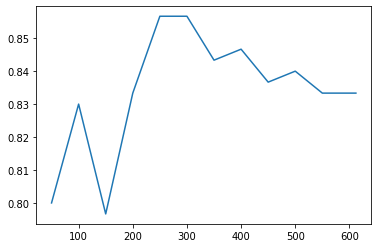

In [ ]:
plt.plot(numOfFeatures, accuracies)

In [ ]:
s = SVC(random_state=42)

X_train_part = X_train_tda[:, rf.feature_importances_.argsort()[-50:][::-1]]
s.fit(X_train_part, y_train)

X_test_num = tda_union.transform(X_test)[:, rf.feature_importances_.argsort()[-50:][::-1]]
s.score(X_test_num, y_test)

0.8

### 8. Grid Search with different numbers of features

#### 8.1 Random Forest

In [ ]:
params_rf = []
scores_rf = []
accuracies_rf = []

rf_params = {
    "n_estimators": [500, 1000],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

for num in numOfFeatures:
    print(num)
    bestFeatures = sortedFeatures[-num:][::-1]
    X_train_best = X_train_tda[:, bestFeatures]

    rf = RandomForestClassifier(random_state=42)

    rf_grid = GridSearchCV(
    estimator=rf, param_grid=rf_params, cv=3, n_jobs=-1, verbose=4
)

    rf_grid.fit(X_train_best, y_train)

    params_rf.append(rf_grid.best_params_)
    scores_rf.append(rf_grid.best_score_)

    X_test_num = X_test_tda[:, bestFeatures]
    accuracies_rf.append(rf_grid.best_estimator_.score(X_test_num, y_test))

print("FINISHED")

In [ ]:
plt.plot(numOfFeatures, accuracies_rf)

In [ ]:
plt.plot(numOfFeatures, scores_rf)

#### 8.2 SVM

In [ ]:
params_svm = []
scores_svm = []
accuracies_svm = []


svm_params = {
    'kernel' : ('linear', 'sigmoid', 'rbf', 'poly'),
    'C' : [10 ** i for i in range(-2, 3)],
    'degree' : [3, 5, 7],
    'coef0' : [j**i for i in np.arange(-4,1,1) for j in np.arange(1.,4.,1.)],
    'gamma' : ('scale', 'auto'),
    'decision_function_shape': ('ovr', 'ovo')
}

for num in numOfFeatures:
    print(num)
    bestFeatures = sortedFeatures[-num:][::-1]
    X_train_best = X_train_tda[:, bestFeatures]

    svm = SVC(random_state=42)

    svm_grid = GridSearchCV(
        estimator=svm, param_grid=svm_params, cv=3, n_jobs=-1, verbose=4
    )

    svm_grid.fit(X_train_best, y_train)

    params_svm.append(svm_grid.best_params_)
    scores_svm.append(svm_grid.best_score_)

    X_test_num = X_test_tda[:, bestFeatures]
    accuracies_svm.append(svm_grid.best_estimator_.score(X_test_num, y_test))

print("FINISHED")

In [ ]:
plt.plot(numOfFeatures, accuracies_svm)

In [ ]:
plt.plot(numOfFeatures, scores_svm)

#### 8.3 Logistic Regression

In [ ]:
params_log = []
scores_log = []
accuracies_log = []


log_params = {
    "C" : np.logspace(-3,3,7), 
    "penalty" : ["l1","l2", "lasso"],
    "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

for num in numOfFeatures:
    print(num)
    bestFeatures = sortedFeatures[-num:][::-1]
    X_train_best = X_train_tda[:, bestFeatures]

    log = LogisticRegression()

    log_grid = GridSearchCV(
        estimator=log, param_grid=log_params, cv=3, n_jobs=-1, verbose=4
    )

    log_grid.fit(X_train_best, y_train)

    params_log.append(log_grid.best_params_)
    scores_log.append(log_grid.best_score_)

    X_test_num = X_test_tda[:, bestFeatures]
    accuracies_log.append(log_grid.best_estimator_.score(X_test_num, y_test))

print("FINISHED")

In [ ]:
plt.plot(numOfFeatures, accuracies_log)

In [ ]:
plt.plot(numOfFeatures, scores_log)

#### 8.4 CatBoost

In [98]:
params_cat = []
scores_cat = []
accuracies_cat = []

grid = {'learning_rate': [0.003, 0.03],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [0.03, 0.1, 1]}

for num in numOfFeatures:
    print(num)
    bestFeatures = sortedFeatures[-num:][::-1]
    X_train_best = X_train_tda[:, bestFeatures]

    cat = CatBoostClassifier(iterations=250);

    grid_search_result = cat.grid_search(grid, 
                                       X=X_train_tda, 
                                       y=y_train, 
                                       plot=True)

    params_cat.append(grid_search_result.params)
    scores_cat.append(grid_search_result.cv_results['train-error-mean'])

    X_test_num = X_test_tda[:, bestFeatures]
    best = CatBoostClassifier(iterations=250, grid_search_result.params);
    best.fit(X_train_best, y_train);
    accuracies_cat.append(best.score(X_test_num, y_test))

print("FINISHED")

50


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2920819	test: 2.2940782	best: 2.2940782 (0)	total: 513ms	remaining: 2m 7s
1:	learn: 2.2815160	test: 2.2852455	best: 2.2852455 (1)	total: 725ms	remaining: 1m 29s
2:	learn: 2.2731389	test: 2.2774098	best: 2.2774098 (2)	total: 942ms	remaining: 1m 17s
3:	learn: 2.2640713	test: 2.2699063	best: 2.2699063 (3)	total: 1.16s	remaining: 1m 11s
4:	learn: 2.2550766	test: 2.2616218	best: 2.2616218 (4)	total: 1.35s	remaining: 1m 6s
5:	learn: 2.2452952	test: 2.2526212	best: 2.2526212 (5)	total: 1.57s	remaining: 1m 3s
6:	learn: 2.2378188	test: 2.2453876	best: 2.2453876 (6)	total: 1.78s	remaining: 1m 1s
7:	learn: 2.2286248	test: 2.2372013	best: 2.2372013 (7)	total: 1.98s	remaining: 59.9s
8:	learn: 2.2181159	test: 2.2282455	best: 2.2282455 (8)	total: 2.15s	remaining: 57.7s
9:	learn: 2.2091755	test: 2.2199046	best: 2.2199046 (9)	total: 2.32s	remaining: 55.7s
10:	learn: 2.2001159	test: 2.2118564	best: 2.2118564 (10)	total: 2.5s	remaining: 54.2s
11:	learn: 2.1897728	test: 2.2034884	best: 2.20348

AttributeError: ignored

### 9 Adding new features


In [ ]:
direction_list = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
    #images.DilationFiltration
    #images.ErosionFiltration
    #images.SignedDistanceFiltration
    #images.DensityFiltration
)

diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
    #NEW FEATURES
    {"metric": "persistence_image", "metric_params": {"p": 1}}, 
    {"metric": "persistence_image", "metric_params": {"p": 2}},
    {"metric": "silhouette", "metric_params": {"p": 1}},
    {"metric": "silhouette", "metric_params": {"p": 2}}
]

feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)] #add features
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)

set_config(display='diagram')

tda_union

FeatureUnion(n_jobs=-1,
             transformer_list=[('pipeline-1',
                                Pipeline(steps=[('binarizer',
                                                 Binarizer(n_jobs=-1,
                                                           threshold=0.4)),
                                                ('heightfiltration',
                                                 HeightFiltration(direction=array([1, 0]),
                                                                  n_jobs=-1)),
                                                ('cubicalpersistence',
                                                 CubicalPersistence(n_jobs=-1)),
                                                ('scaler', Scaler(n_jobs=-1)),
                                                ('featureunion',
                                                 FeatureUnion(transformer_list=[('persistenceentropy',
                                                                                 Persist...
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-14',
                                                                                 Amplitude(metric='persistence_image',
                                                                                           metric_params={'p': 1},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-15',
                                                                                 Amplitude(metric='persistence_image',
                                                                                           metric_params={'p': 2},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-16',
                                                                                 Amplitude(metric='silhouette',
                                                                                           metric_params={'p': 1},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-17',
                                                                                 Amplitude(metric='silhouette',
                                                                                           metric_params={'p': 2},
                                                                                           n_jobs=-1))]))]))])

In [ ]:
X_train_tda = tda_union.fit_transform(X_train)
X_test_tda = tda_union.transform(X_test)
X_train_tda.shape

(700, 612)

### 10. Train models without topological features

In [ ]:
X_train_notop = X_train.reshape(X_train.shape[0],-1)
X_test_notop = X_test.reshape(X_test.shape[0],-1)

Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_notop, y_train)

rf.score(X_test_notop, y_test)

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_notop, y_train)

lr.score(X_test_notop, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8833333333333333

SVC

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train_notop, y_train)

model_linear.score(X_test_notop, y_test)

0.8733333333333333

LightGBM

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_notop, y_train)

lgbm.score(X_test_notop, y_test)

0.8633333333333333

CatBoost

In [ ]:
cat = CatBoostClassifier(task_type="GPU",
                           devices='0:1')
cat.fit(X_train_notop, y_train, verbose=False)

cat.score(X_test_notop, y_test)

0.89

XGBT

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_notop, y_train)

xgb.score(X_test_notop, y_test)

0.8566666666666667

### 11 Grid Search for non-topological models

In [ ]:
X_train_notop = X_train.reshape(X_train.shape[0],-1)
X_test_notop = X_test.reshape(X_test.shape[0],-1)

In [ ]:
rf_feat_notop = RandomForestClassifier()
rf_feat_notop.fit(X_train_notop, y_train)
sortedFeatures = rf_feat_notop.feature_importances_.argsort()

numOfFeatures_notop = np.arange(50, len(sortedFeatures), 50)

In [ ]:
params_notop_svm = []
scores_notop_svm = []
accuracies_notop_svm = []

svm_params = {
    'kernel' : ('linear', 'sigmoid', 'rbf', 'poly'),
    'C' : [10, 100],#[10 ** i for i in range(-2, 3)],
    'degree' : [3, 5, 7],
    'coef0' : [j**i for i in np.arange(-4,1,1) for j in np.arange(1.,4.,1.)],
    'gamma' : ('scale', 'auto'),
    'decision_function_shape': ('ovr', 'ovo')
}

for num in numOfFeatures_notop:
    print(num)
    bestFeatures = sortedFeatures[-num:][::-1]
    X_train_best = X_train_notop[:, bestFeatures]

    svm = SVC(random_state=42)

    svm_grid = GridSearchCV(
        estimator=svm, param_grid=svm_params, cv=3, n_jobs=-1, verbose=4
    )

    svm_grid.fit(X_train_best, y_train)

    params_notop_svm.append(svm_grid.best_params_)
    scores_notop_svm.append(svm_grid.best_score_)

    X_test_num = X_test_notop[:, bestFeatures]
    accuracies_notop_svm.append(svm_grid.best_estimator_.score(X_test_num, y_test))

In [ ]:
plt.plot(numOfFeatures_notop, scores_notop_svm, "-b", label="Обычные признаки")
plt.plot(numOfFeatures, scores_svm, "-r", label="Топологические признаки")
plt.legend(loc='best')
plt.title("Сравнение SVM с обычными и топологическими признаками на тренировочной выборке")
#plt.savefig('images/svm_diff_features_train.png')
plt.show()

In [ ]:
plt.plot(numOfFeatures_notop, accuracies_notop_svm, "-b", label="Обычные признаки")
plt.plot(numOfFeatures, accuracies_svm, "-r", label="Топологические признаки")
plt.legend(loc='best')
plt.title("Сравнение SVM с обычными и топологическими признаками на тестовой выборке")
#plt.savefig('images/svm_diff_features_test.png')
plt.show()

In [ ]:
params_notop_rf = []
scores_notop_rf = []
accuracies_notop_rf = []

rf_params = {
    "n_estimators": [500, 1000],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

for num in numOfFeatures_notop:
    print(num)
    bestFeatures = sortedFeatures[-num:][::-1]
    X_train_best = X_train_notop[:, bestFeatures]

    rf = RandomForestClassifier(random_state=42)

    rf_grid = GridSearchCV(
    estimator=rf, param_grid=rf_params, cv=3, n_jobs=-1, verbose=4
)

    rf_grid.fit(X_train_best, y_train)

    params_notop_rf.append(rf_grid.best_params_)
    scores_notop_rf.append(rf_grid.best_score_)

    X_test_num = X_test_notop[:, bestFeatures]
    accuracies_notop_rf.append(rf_grid.best_estimator_.score(X_test_num, y_test))

print("FINISHED")

In [ ]:
plt.plot(numOfFeatures_notop, scores_notop_rf, "-b", label="Обычные признаки")
plt.plot(numOfFeatures, scores_rf, "-r", label="Топологические признаки")
plt.legend(loc='best')
plt.title("Сравнение Random Forest с обычными и топологическими признаками на тренировочной выборке")
#plt.savefig('images/rf_diff_features_train.png')
plt.show()

In [ ]:
plt.plot(numOfFeatures_notop, accuracies_notop_rf, "-b", label="Обычные признаки")
plt.plot(numOfFeatures, accuracies_rf, "-r", label="Топологические признаки")
plt.legend(loc='best')
plt.title("Сравнение Random Forest с обычными и топологическими признаками на тестовой выборке")
#plt.savefig('images/rf_diff_features_test.png')
plt.show()

In [ ]:
params_notop_log = []
scores_notop_log = []
accuracies_notop_log = []


log_params = {
    "C" : np.logspace(-3,3,7), 
    "penalty" : ["l1","l2", "lasso"],
    "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

for num in numOfFeatures_notop:
    print(num)
    bestFeatures = sortedFeatures[-num:][::-1]
    X_train_best = X_train_notop[:, bestFeatures]

    log = LogisticRegression()

    log_grid = GridSearchCV(
        estimator=log, param_grid=log_params, cv=3, n_jobs=-1, verbose=4
    )

    log_grid.fit(X_train_best, y_train)

    params_notop_log.append(log_grid.best_params_)
    scores_notop_log.append(log_grid.best_score_)

    X_test_num = X_test_notop[:, bestFeatures]
    accuracies_notop_log.append(log_grid.best_estimator_.score(X_test_num, y_test))

print("FINISHED")

In [ ]:
plt.plot(numOfFeatures_notop, scores_notop_log, "-b", label="Обычные признаки")
plt.plot(numOfFeatures, scores_log, "-r", label="Топологические признаки")
plt.legend(loc='best')
plt.title("Сравнение Logistic Regression с обычными и топологическими признаками на тренировочной выборке")
#plt.savefig('images/log_diff_features_train.png')
plt.show()

In [ ]:
plt.plot(numOfFeatures_notop, accuracies_notop_log, "-b", label="Обычные признаки")
plt.plot(numOfFeatures, accuracies_log, "-r", label="Топологические признаки")
plt.legend(loc='best')
plt.title("Сравнение Logistic Regression с обычными и топологическими признаками на тестовой выборке")
#plt.savefig('images/log_diff_features_test.png')
plt.show()

In [89]:
params_notop_cat = []
scores_notop_cat = []
accuracies_notop_cat = []

grid = {'learning_rate': [0.003, 0.03],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [0.03, 0.1, 1]}

for num in numOfFeatures_notop:
    print(num)
    bestFeatures = sortedFeatures[-num:][::-1]
    X_train_best = X_train_notop[:, bestFeatures]

    cat = CatBoostClassifier(iterations=250);

    grid_search_result = cat.grid_search(grid, 
                                       X=X_train_best, 
                                       y=y_train, 
                                       plot=True)

    #grid_search_result.fit(X_train_best, y_train)

    params_notop_cat.append(grid_search_result.params)
    scores_notop_cat.append(grid_search_result.cv_results['train-error-mean'])

    X_test_num = X_test_notop[:, bestFeatures]
    best = CatBoostClassifier(iterations=250, grid_search_result.params);
    best.fit(X_train_best, y_train);
    accuracies_notop_cat.append(best.score(X_test_num, y_test))

print("FINISHED")

SyntaxError: positional argument follows keyword argument (<ipython-input-89-94100b4e223b>, line 27)

In [ ]:
plt.plot(numOfFeatures_notop, scores_notop_cat, "-b", label="Обычные признаки")
plt.plot(numOfFeatures, scores_cat, "-r", label="Топологические признаки")
plt.legend(loc='best')
plt.title("Сравнение CatBoost с обычными и топологическими признаками на тренировочной выборке")

In [ ]:
plt.plot(numOfFeatures_notop, accuracies_notop_cat, "-b", label="Обычные признаки")
plt.plot(numOfFeatures, accuracies_cat, "-r", label="Топологические признаки")
plt.legend(loc='best')
plt.title("Сравнение CatBoost с обычными и топологическими признаками на тестовой выборке")

In [ ]:
plt.plot(numOfFeatures, accuracies_log, "-b", label="Logistic Regression")
plt.plot(numOfFeatures, accuracies_svm, "-r", label="SVM")
plt.plot(numOfFeatures, accuracies_rf, "-g", label="Random Forest")
plt.legend(loc='best')
#plt.title("Сравнение CatBoost с обычными и топологическими признаками на тестовой выборке")
plt.savefig("images/models-topfeatures.png")
plt.show()

In [ ]:
best_svm_model = SVC(random_state=42, **params_svm[6])

In [48]:
pearsonr(X_train_tda, y_train)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [53]:
import pandas as pd
data = pd.DataFrame(X_train_tda)
corr = data.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [59]:
data_test = pd.DataFrame(X_test_tda)
data_test = data_test[selected_columns]

In [60]:
data_test.shape

(300, 51)

In [55]:
best_svm_model.fit(data, y_train)

SVC(C=10, coef0=1.0, degree=5, gamma='auto', kernel='poly', random_state=42)

In [61]:
best_svm_model.score(data_test, y_test)

0.83

In [103]:
best_svm_model = SVC(random_state=42, **params_svm[6])
best_svm_model.fit(X_train_tda[:,sortedFeatures[-numOfFeatures[6]:][::-1]], y_train)

SVC(C=10, coef0=1.0, degree=5, gamma='auto', kernel='poly', random_state=42)

In [104]:
best_svm_model.score(X_test_tda[:,sortedFeatures[-numOfFeatures[6]:][::-1]], y_test)

0.89

In [105]:
y_hat = best_svm_model.predict(X_test_tda[:,sortedFeatures[-numOfFeatures[6]:][::-1]])

In [106]:
mismatches = np.where((y_hat == y_test) == False)[0]

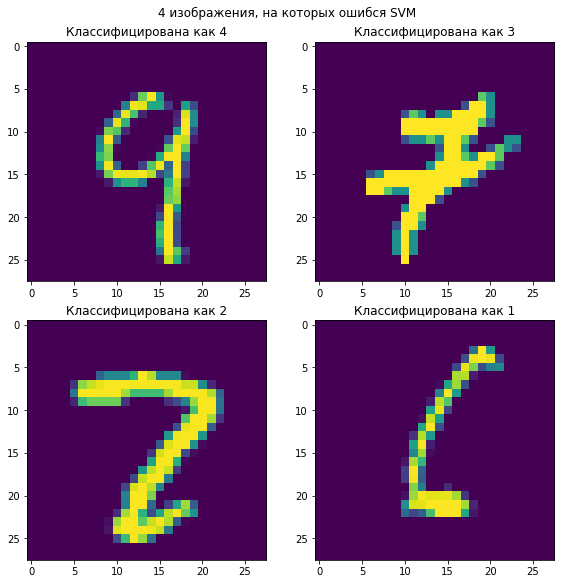

In [115]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8), constrained_layout=True)
for i in range(4):
    ax = axes.flat[i]
    ind = mismatches[i+4]
    ax.imshow(X_test[ind])
    ax.title.set_text("Классифицирована как {}".format(y_hat[ind]))
fig.suptitle("4 изображения, на которых ошибся SVM")
plt.savefig("images/missclassified.png")
plt.show()
